# Cluster plotter compatibility

You can use `napari-brainbow-diagnose` with `napari-cluster-plotter`.

`napari-cluster-plotter` use point_layer.features to store the data available axis.
Column with `CLUSTER` in their name can be used as cluster column.


In [1]:
import napari
from napari.utils import nbscreenshot
from napari_brainbow_diagnose import fetch_chroms_data, make_rgb_cube_data
from napari_brainbow_diagnose import create_rgb_features_widget


import numpy as np

Create the viewer and populate it with brainbow layers and a random point layer

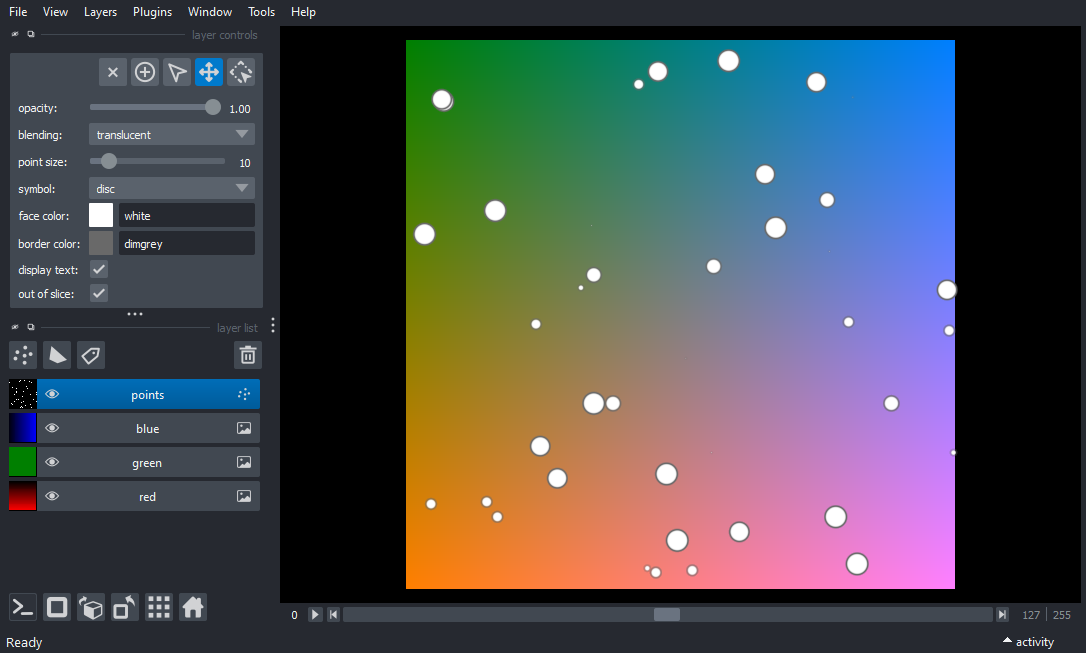

In [2]:
viewer = napari.Viewer()
bb = make_rgb_cube_data()

red_layer = viewer.add_image(bb[0][0], name="red", colormap='red', blending='additive')
green_layer = viewer.add_image(bb[1][0], name="green", colormap='green', blending='additive')
blue_layer = viewer.add_image(bb[2][0], name="blue", colormap='blue', blending='additive')
n_points = 1000
points = np.array([
    np.random.randint(0, bb[0][0].shape[0], n_points),
    np.random.randint(0, bb[0][0].shape[1], n_points),
    np.random.randint(0, bb[0][0].shape[2], n_points),
]).T

point_layer = viewer.add_points(points, out_of_slice_display=True)
nbscreenshot(viewer)

using the widget under `Plugins>Napari Brainbow Diagnose>Extract RGB features from brainbow image` you will add to the `point_layer.features` the RGB values of the brainbow image and all the available channel space in `napari-brainbow-diagnose`

In [3]:
create_rgb_features_widget(red_layer, green_layer, blue_layer, point_layer)

point_layer.features

,R,G,B,SELECTED_CLUSTER,H,S,V,wheel_x,wheel_y,X_maxwell,Y_maxwell,spherical_radius,spherical_theta,spherical_phi
0,246.0,7.0,87.0,0,0.944212,0.971545,246.0,0.956234,0.333190,0.269996,0.020588,8030.95131,70.530712,1.629928
1,71.0,201.0,249.0,0,0.544944,0.714859,249.0,0.156727,0.400401,-0.197252,0.385797,8030.95131,40.567150,70.545056
2,245.0,99.0,120.0,0,0.976027,0.595918,245.0,0.794586,0.455290,0.155536,0.213362,8030.95131,65.576150,22.002729
3,219.0,115.0,154.0,0,0.937500,0.474886,219.0,0.719369,0.409135,0.076901,0.235656,8030.95131,58.094461,27.704600
4,171.0,117.0,1.0,0,0.113725,0.994152,171.0,0.875483,0.825726,0.339618,0.404844,8030.95131,89.723472,34.380345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233.0,157.0,93.0,0,0.076190,0.600858,233.0,0.766657,0.638390,0.167348,0.325052,8030.95131,71.684988,33.972868
996,128.0,88.0,183.0,0,0.736842,0.519126,183.0,0.478565,0.241324,-0.079585,0.220551,8030.95131,40.324871,34.508523
997,164.0,133.0,75.0,0,0.108614,0.542683,164.0,0.710570,0.671133,0.138129,0.357527,8030.95131,70.445215,39.041209
998,153.0,40.0,105.0,0,0.904130,0.738562,153.0,0.804286,0.290766,0.092996,0.134228,8030.95131,56.417478,14.651359


You can now use the `napari-cluster-plotter` to plot the data. For example using the maxwell representation

In [4]:
from napari_clusters_plotter import PlotterWidget

pw = PlotterWidget(viewer)
pw.plot_x_axis.setCurrentIndex(9)
pw.plot_y_axis.setCurrentIndex(10)
viewer.window.add_dock_widget(pw, area='right')

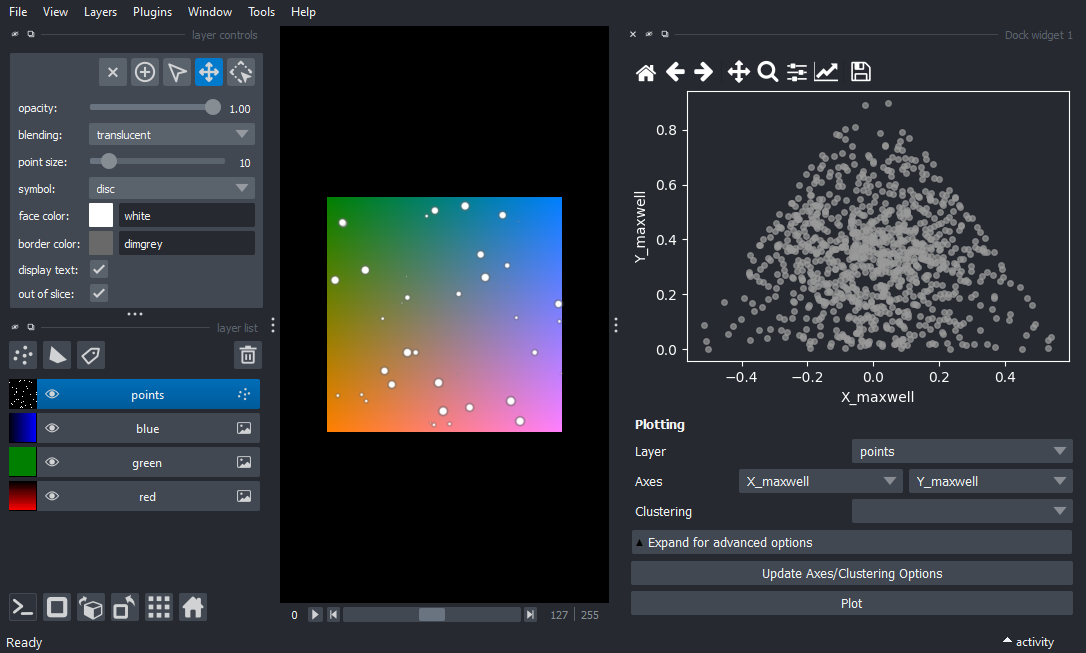

In [5]:
pw.run(point_layer.features, "X_maxwell", "Y_maxwell")
nbscreenshot(viewer)


If you want to cluster the points according to the point you select on the image you can use the `SELECTED_CLUSTER` feature column

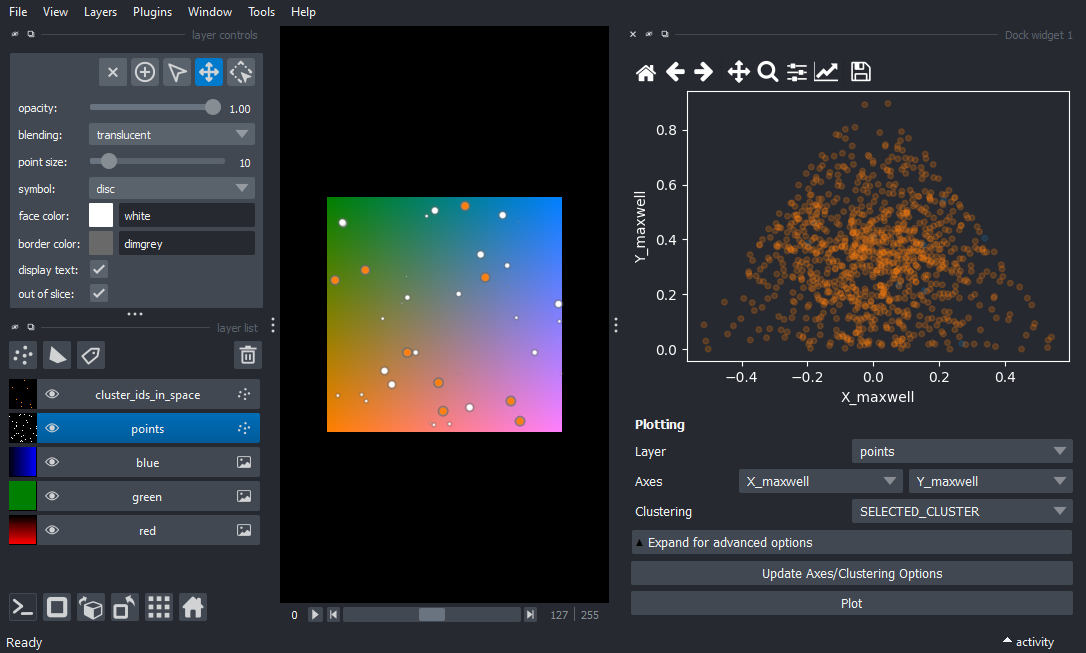

In [6]:
point_layer.selected_data = [0, 1, 2, 3, 4, 5, 10, 11, 12]
pw.plot_cluster_id.setCurrentIndex(1)
pw.run(point_layer.features, "X_maxwell", "Y_maxwell", "SELECTED_CLUSTER")
nbscreenshot(viewer)


You can also use the `napari-cluster-plotter` to plot the histogram of the data.

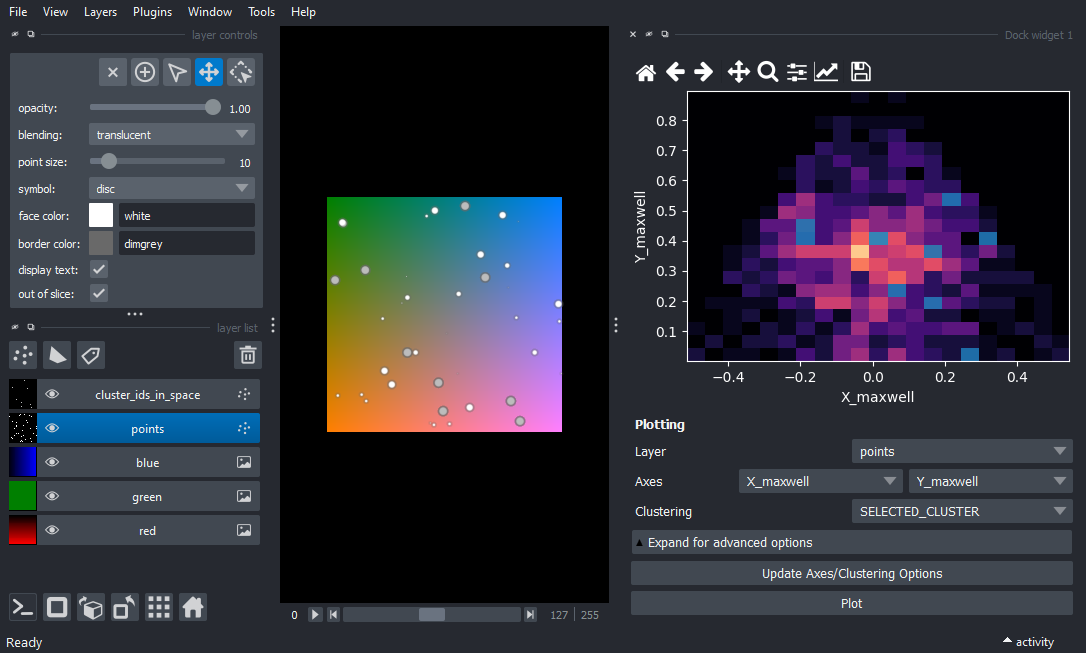

c:\Users\CHROMS\mambaforge-pypy3\envs\napari-brainbow-diagnose\lib\site-packages\ipykernel\eventloops.py:145: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  el.exec() if hasattr(el, "exec") else el.exec_()


In [7]:
pw.plotting_type.setCurrentIndex(1)
pw.bin_number_manual_container
nbscreenshot(viewer)
